In [1]:
import pandas as pd
import pandas_profiling 
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Admission_Prediction.csv')

In [3]:
pr=ProfileReport(df)

In [4]:
pr.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
pr.to_file('Datareport.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

from sklearn.linear_model import ElasticNet
>>> elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
>>> elastic_net.predict(x_test)

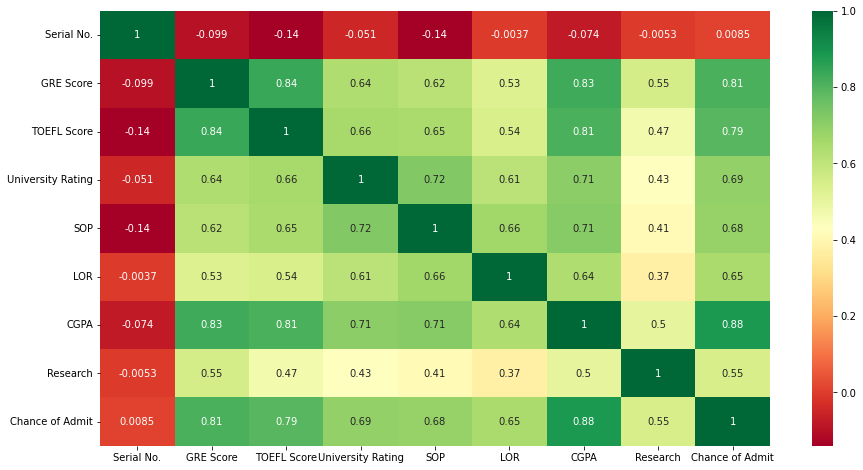

In [6]:
correlation=df.corr()
correlation_features=correlation.index
plt.figure(figsize=(15,8))
g=snb.heatmap(df[correlation_features].corr(),annot=True,cmap='RdYlGn')

In [7]:
df['GRE Score']=df['GRE Score'].fillna(np.mean(df['GRE Score']))

In [8]:
df['TOEFL Score']=df['TOEFL Score'].fillna(np.mean(df['TOEFL Score']))

In [9]:
df['University Rating']=df['University Rating'].fillna(np.mean(df['University Rating']))

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

divid data into x and y
pss x into standard scaler and covert back to dataframe(pd.DataFrame)before doing tain test slpit

In [11]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [12]:
x=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']

In [13]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
arr=sc.fit_transform(x)


In [17]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [18]:
df1=pd.DataFrame(arr)

In [21]:
pr2=ProfileReport(df1)
pr2.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
pr2.to_file('Transformed_Datareport.hmtl')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Macbook\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension .hmtl not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df1

,0,1,2,3,4,5,6
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


In [25]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


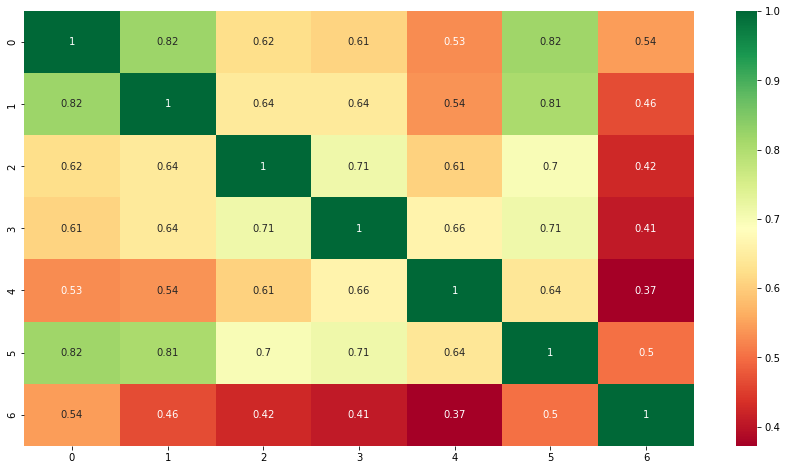

In [26]:
correlation=df1.corr()
correlation_features=correlation.index
plt.figure(figsize=(15,8))
g=snb.heatmap(df1[correlation_features].corr(),annot=True,cmap='RdYlGn')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(arr,y,test_size=0.3,random_state=100)

In [29]:
from sklearn.linear_model import ElasticNetCV

In [30]:
from sklearn.linear_model import ElasticNet

In [31]:
elastic=ElasticNetCV(alphas=None,cv = 10)

In [32]:
elastic.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [33]:
elastic.alpha_

0.0012721883975990776

In [34]:
elastic.l1_ratio_

0.5

In [35]:
elastic_model=ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)

In [36]:
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=0.0012721883975990776)

In [37]:
elastic_model.score(x_test,y_test)

0.8341639481827795

please note that since we have applied standardscaler, the input giving to the model must also be scaled. to scale the input you can do this;
test_data=scaler.transform([[insert values]])

In [38]:
y_pred=elastic_model.predict(x_test)

In [39]:
x_test

array([[ 1.03140717,  1.29228759,  0.77890565, ...,  0.55812525,
         0.96582684,  0.88640526],
       [-0.59126081, -1.35440382, -0.99465886, ..., -1.60515091,
        -2.11258485, -1.12815215],
       [-0.50111259, -0.69273097, -0.1078766 , ...,  0.55812525,
        -0.80508741, -1.12815215],
       ...,
       [-1.94348412, -1.35440382, -1.88144112, ..., -2.14596996,
        -1.66571863, -1.12815215],
       [ 1.12155539,  1.12686938, -0.99465886, ...,  0.55812525,
        -0.02720919,  0.88640526],
       [ 1.03140717,  0.1343601 ,  0.77890565, ...,  0.55812525,
         0.99892804,  0.88640526]])

In [40]:
y_test

69     0.78
29     0.54
471    0.64
344    0.47
54     0.70
       ... 
308    0.69
171    0.89
457    0.37
75     0.72
311    0.84
Name: Chance of Admit, Length: 150, dtype: float64

In [41]:
y_pred

array([0.85860425, 0.47243836, 0.62712302, 0.44870059, 0.644668  ,
       0.85533861, 0.58586004, 0.66886595, 0.8160555 , 0.68638754,
       0.66559386, 0.6138537 , 0.89363917, 0.75725157, 0.63758125,
       0.50379065, 0.59319252, 0.74811569, 0.55935738, 0.71983604,
       0.89717286, 0.61262086, 0.84840466, 0.82673398, 0.99467934,
       0.60419855, 0.68444531, 0.93600632, 0.87855348, 0.70312591,
       0.78581127, 0.85165005, 0.75072852, 0.5522683 , 0.7409416 ,
       0.78259758, 0.79666521, 0.57886919, 0.53874005, 0.70201251,
       0.94720361, 0.59030838, 0.83511031, 0.78670729, 0.81186918,
       0.54777339, 0.59729743, 0.8743277 , 0.95010109, 0.59995187,
       0.8167691 , 0.71080924, 0.80812372, 0.98949122, 0.64583322,
       0.856272  , 0.62019976, 0.89600752, 0.77207933, 0.73662588,
       0.68742531, 0.62680392, 0.4790475 , 0.88378574, 0.6510982 ,
       0.68558957, 0.70529613, 0.4635885 , 0.8382648 , 0.8447558 ,
       0.92734744, 0.77481447, 0.65938865, 0.83539857, 0.64846

In [42]:
elastic_model.score(x_test,y_test)

0.8341639481827795

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, y_pred)

0.8341639481827795

Text(0.5, 1.0, 'Price Prediction')

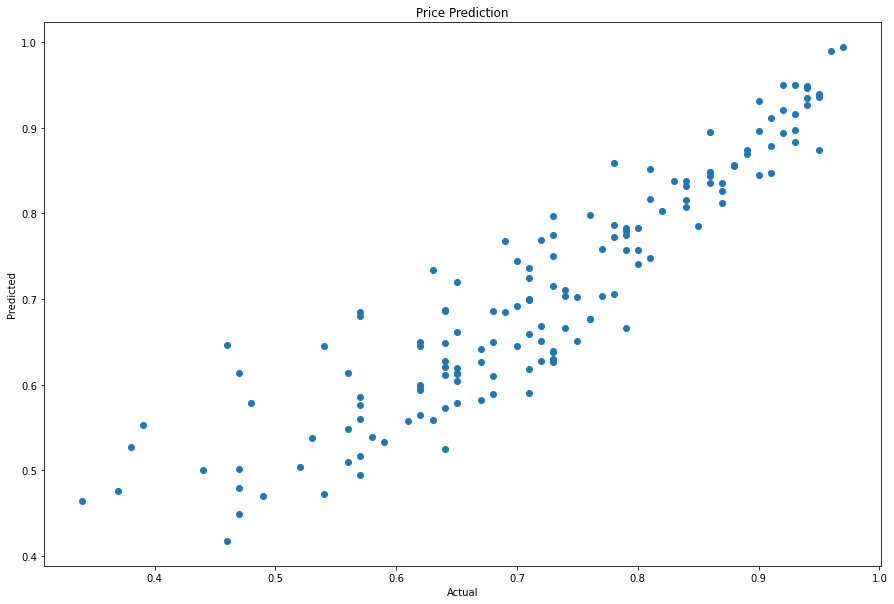

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Price Prediction')

<AxesSubplot:xlabel='Chance of Admit'>

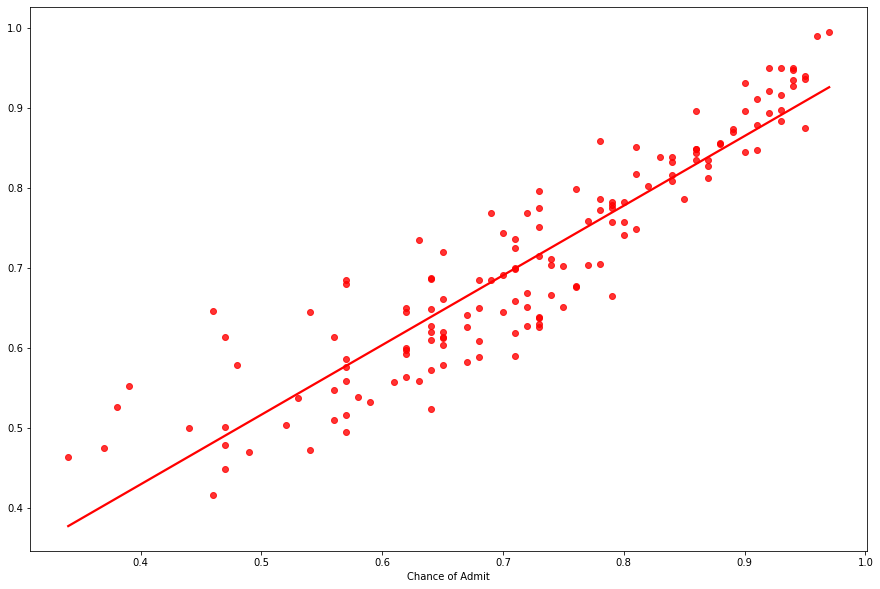

In [46]:
plt.figure(figsize=(15,10))
snb.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [343]:
def adj_r2(x,y):
    r2=elastic_model.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [344]:
adj_r2(x_test,y_test)

0.8259889315439024

In [346]:
import pickle
# open a file, where you ant to store the data
file = open('elastic_model.pkl', 'wb')

# dump information to that file
pickle.dump(elastic_model, file)